## Get the 5-minute and 15-minute data

You can use the `APPL_5min_60days.csv` file directly. It includes the 5-minute and 15-minute prices and volumes between 2024-11-25 and 2025-02-24. 

In [1]:
# import yfinance as yf
# data_5 = yf.download("AAPL", interval="5m", period="60d") 
# data_15 = yf.download("AAPL", interval="15m", period="60d")
# data_5.to_csv("AAPL_5min_60days.csv")
# data_15.to_csv("AAPL_15min_60days.csv")

## Analyze Intraday Patterns

1. Opening Gaps on 15-Minute Data
2. Midday Reversals on 15-Minute Data

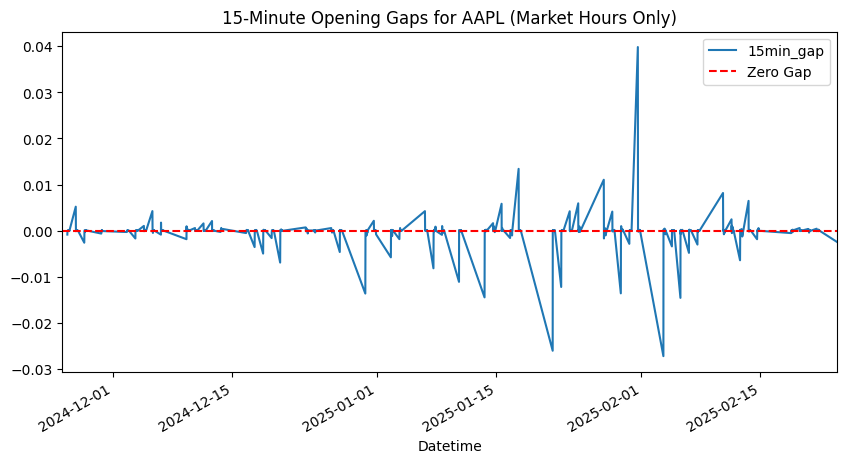

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("AAPL_15min_60days.csv")
# Convert 'Timestamp' to datetime and set it as the index
data['Datetime'] = pd.to_datetime(data['Datetime']) 
data.set_index('Datetime', inplace=True) 

# Opening Gaps on 15-Minute Data
data['15min_gap'] = (data['Open'] - data['Close'].shift(1)) / data['Close'].shift(1)

# Plot the 15-minute gaps
data['15min_gap'].plot(figsize=(10, 5), title='15-Minute Opening Gaps for AAPL (Market Hours Only)')
plt.xlim(pd.to_datetime('2024-11-25'), pd.to_datetime('2025-02-24'))
plt.axhline(0, color='red', linestyle='--', label='Zero Gap')
plt.legend()
plt.show()

In [3]:
# Function to detect mid-15-minute reversals
def detect_mid_15min_reversal(row, threshold=0.01):
    """
    Detects a mid-15-minute reversal based on Open, High, Low, and Close prices.
    :param row: A row of the DataFrame containing Open, High, Low, and Close prices.
    :param threshold: Minimum price change (in percentage) to qualify as a reversal.
    :return: True if a reversal is detected, False otherwise.
    """
    # Calculate price changes
    high_to_low = (row['High'] - row['Low']) / row['Open'] # Percentage change from high to low
    open_to_high = (row['High'] - row['Open']) / row['Open']   # Percentage change from open to high
    open_to_low = (row['Low'] - row['Open']) / row['Open']   # Percentage change from open to low

    # Check for reversal
    if abs(high_to_low) >= threshold:  # Ensure the price movement is significant
        if open_to_high > 0 > open_to_low:  # Price rose and then fell
            return True
        elif open_to_high < 0 < open_to_low:  # Price fell and then rose
            return True
    return False

# Apply the function to each row
data['Mid_15min_Reversal'] = data.apply(detect_mid_15min_reversal, axis=1)

# Count the number of reversals
reversal_count = data['Mid_15min_Reversal'].sum()
print(f"Total mid-15-minute reversals detected: {reversal_count}")
print(data.loc[data['Mid_15min_Reversal'] == True])

Total mid-15-minute reversals detected: 23
                                Close        High         Low        Open  \
Datetime                                                                    
2024-11-25 20:45:00+00:00  232.880005  233.169998  229.845001  230.354996   
2024-12-02 14:30:00+00:00  238.460007  239.600006  237.160004  237.270004   
2024-12-17 14:30:00+00:00  252.779999  252.860397  249.789993  250.134995   
2024-12-27 14:30:00+00:00  256.440002  258.700012  256.109985  257.899994   
2025-01-02 14:30:00+00:00  245.195999  249.100006  244.800003  248.929993   
2025-01-13 14:30:00+00:00  231.169998  233.589996  230.199997  233.500000   
2025-01-15 14:30:00+00:00  237.350006  237.520004  234.429993  234.639999   
2025-01-17 14:30:00+00:00  229.889008  232.289993  229.720001  231.309998   
2025-01-21 14:30:00+00:00  220.899994  224.419998  220.800003  224.000000   
2025-01-22 14:30:00+00:00  221.447998  223.089996  219.800003  219.940002   
2025-01-27 14:30:00+00:00  226.72